In [3]:
%pylab inline
%load_ext rmagic

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [13]:
%%R
library(Quandl)
library(xts)
library(quantmod)

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [14]:
%%R
currencies <- c( "USD", "CHF", "GBP", "JPY", "RUB", "CAD", "AUD")
currencies <- paste("CURRFX/EUR", currencies, sep = "")
currency_ts <- lapply(as.list(currencies), Quandl, start_date="2005-01-01",end_date="2013-06-07", type="xts")

print(head(currency_ts))

[[1]]
              Rate High (est) Low (est)
2005-01-03 1.35779     1.3746    1.3412
2005-01-04 1.34982     0.0000    0.0000
2005-01-05 1.33431     1.3498    1.3190
2005-01-06 1.32626     1.3421    1.3106
2005-01-07 1.32069     0.0000    0.0000
2005-01-10 1.31006     0.0000    0.0000
2005-01-11 1.30730     0.0000    0.0000
2005-01-12 1.31037     1.3264    1.2945
2005-01-13 1.32073     1.3354    1.3062
2005-01-14 1.32378     1.3385    1.3092
2005-01-17 1.31446     1.3306    1.2985
2005-01-18 1.30812     0.0000    0.0000
2005-01-19 1.30389     1.3190    1.2890
2005-01-20 1.30126     1.3160    1.2867
2005-01-21 1.29845     1.3143    1.2828
2005-01-24 1.30183     0.0000    0.0000
2005-01-25 1.30553     1.3213    1.2899
2005-01-26 1.30035     1.3156    1.2853
2005-01-27 1.30350     1.3179    1.2892
2005-01-28 1.30505     0.0000    0.0000
2005-01-31 1.30344     1.3194    1.2876
2005-02-01 1.30344     0.0000    0.0000
2005-02-02 1.30408     0.0000    0.0000
2005-02-03 1.30396     0.0000    0

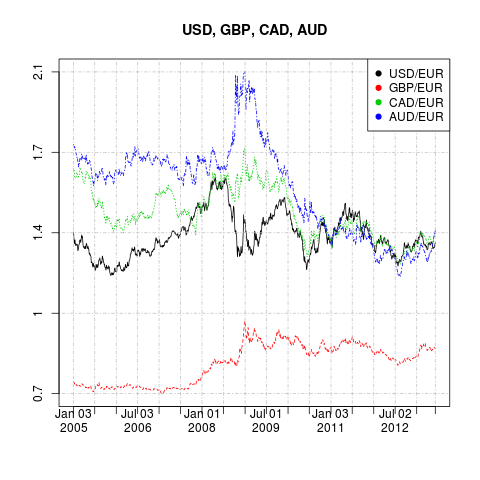

In [9]:
%%R
Q <- cbind(
currency_ts[[1]]$Rate,currency_ts[[3]]$Rate,currency_ts[[6]]$Rate,currency_ts[[7]]$Rate)


matplot(Q, type = "l", xlab = "", ylab = "", main = "USD, GBP, CAD, AUD",xaxt = 'n', yaxt = 'n')
ticks = axTicksByTime(currency_ts[[1]])
abline(v = ticks,h = seq(min(Q), max(Q), length = 5), col = "grey", lty =4)
axis(1, at = ticks, labels = names(ticks))
axis(2, at = seq(min(Q), max(Q), length = 5), labels = round(seq(min(Q),max(Q), length = 5), 1))
legend("topright", legend = c("USD/EUR", "GBP/EUR", "CAD/EUR", "AUD/EUR"), col = 1:4, pch = 19)

In [15]:
%%R
bmw_stock<- new.env()
getSymbols("BMW.DE", env = bmw_stock, src = "yahoo", from =
as.Date("2010-01-01"), to = as.Date("2013-12-31"))

BMW<-bmw_stock$BMW.DE
print(head(BMW))

    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.
           BMW.DE.Open BMW.DE.High BMW.DE.Low BMW.DE.Close BMW.DE.Volume
2010-01-04      31.820      32.455     31.820       32.050       1808100
2010-01-05      31.960      32.410     31.785       32.310       1564100
2010-01-06      32.450      33.040     32.360       32.810       2218600
2010-01-07      32.650      33.200     32.380       33.100       2026100
2010-01-08      33.335      33.430     32.515       32.655       1925800
2010-01-11      32.995      33.050     32.110       32.170       2157800
           BMW.DE.Adjusted
2010-01-04   

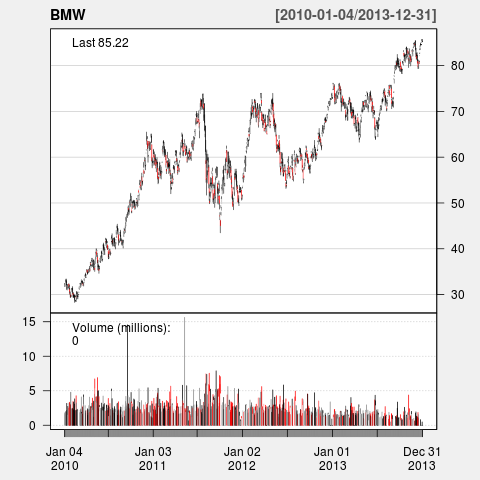

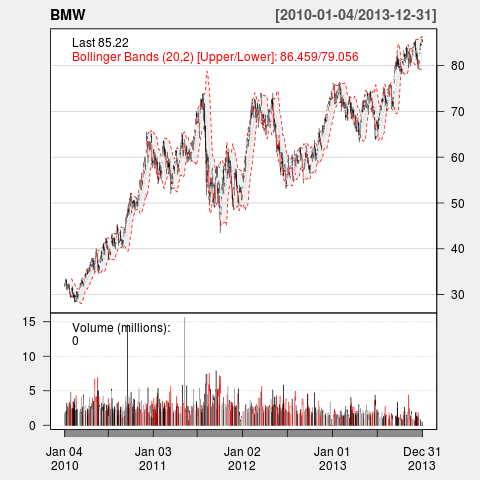

In [16]:
%%R

chartSeries(BMW,multi.col=TRUE,theme="white")
addMACD()
addBBands()

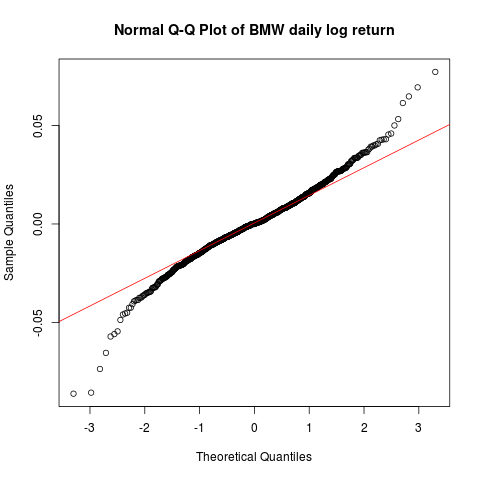

In [17]:
%%R
BMW_return <-
log(BMW$BMW.DE.Close/BMW$BMW.DE.Open)
qqnorm(BMW_return, main = "Normal Q-Q Plot of BMW daily log return",
 xlab = "Theoretical Quantiles",
 ylab = "Sample Quantiles", plot.it = TRUE, datax = FALSE
 )
qqline(BMW_return, col="red")

In [18]:
%%R

library(bigmemory)
library(biganalytics)

Loading required package: bigmemory.sri
Loading required package: BH

bigmemory >= 4.0 is a major revision since 3.1.2; please see packages
biganalytics and and bigtabulate and http://www.bigmemory.org for more information.



In [19]:
%%R

x<-read.big.matrix( "FlightTicketData.csv", type='integer', header=TRUE,
backingfile="data.bin",descriptorfile="data.desc")
xm<-as.matrix(x)
nrow(x)

Error in read.big.matrix("FlightTicketData.csv", type = "integer", header = TRUE,  : 
  The file FlightTicketData.csv could not be found
